# **Project Machine Learning #1 - Muhammad Nur Alfin Huda - MC329D5Y0853**

## **Import Library**

Kode berikut merupakan kode untuk melakukan import library yang dibutuhkan pada project ini

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## **Data Loading**

Menggunakan Library Pandas untuk mengimpor data CSV dari directory menjadi dataframe agar data dapat digunakan pada project ini

In [4]:
# Path ke dataset
file_path = 'data/student_lifestyle_dataset..csv'
df = pd.read_csv(file_path)

print("\nMenampilkan lima baris awal dataset:")
print(df.head())
print("\nMenampilkan informasi dataset:")
df.info()


Menampilkan lima baris awal dataset:
   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

  Stress_Level  Gender  Grades  
0     Moderate    Male    7

## **Exploratory Data Analysis (EDA)**

### **Deskripsi Variabel**

#### Melihat informasi dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   Stress_Level                     2000 non-null   object 
 7   Gender                           2000 non-null   object 
 8   Grades                           2000 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 140.8+ KB


Deskripsi:
- terdapat 9 kolom dan semuanya memiliki jumlah data yang lengkap, dapat disimpulkan bahwa data tersebut tidak terdapat missing value
- Terdapat 3 tipe data float64(6), int64(1), dan object(2)
- dimana fitur bertipe object nantinya perlu dilakukan encoding

#### Mengecek statistik deskriptif pada kolom numerik

In [6]:
# Statistik deskriptif kolom numerik
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Grades
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,7.789825
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.746777
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,5.600000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,7.250000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,7.780000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,8.320000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,10.000000


Deskripsi:
- Pada kolom **Physical_Activity_Hours_Per_Day**	terdapat indikasi outlier dikarenakan nilai maksimum 13 jam tampak sangat tidak realistis untuk aktivitas fisik per hari, sehingga perlu ada penanganan lebih lanjut.

### **Missing Value & Duplicate Data**

#### Melakukan pengecekan missiong value untuk memastikan data benar-benar tidak ada missing value dan pengecekan data duplicat

In [7]:
df.isnull().sum()

,0
Student_ID,0
Study_Hours_Per_Day,0
Extracurricular_Hours_Per_Day,0
Sleep_Hours_Per_Day,0
Social_Hours_Per_Day,0
Physical_Activity_Hours_Per_Day,0
Stress_Level,0
Gender,0
Grades,0


In [8]:
duplicated  = df.duplicated().sum()
print(f"Data Duplicat: {duplicated}")

Data Duplicat: 0


Dari hasil yang ditampilkan semua bernilai 0 sehingga bisa dipastikan tidak terdapat missing value dan data duplicat

### **Menangani Ouliers**

Pada pengecekan satistik deskriptif terdapat indikasi outlier maka perlu dilakukan pengecekan menggunakan visualisasi Boxplot

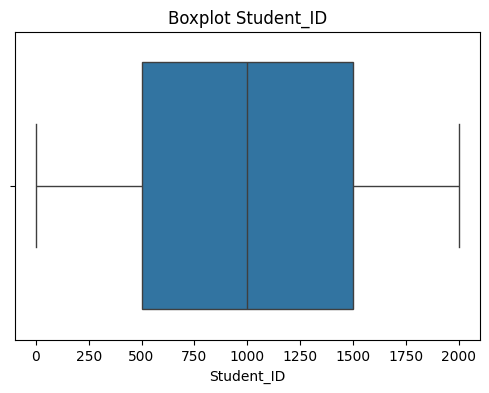

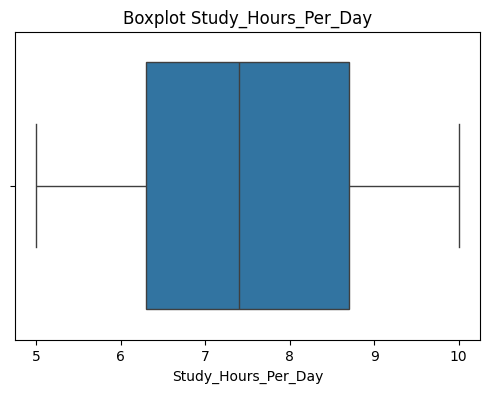

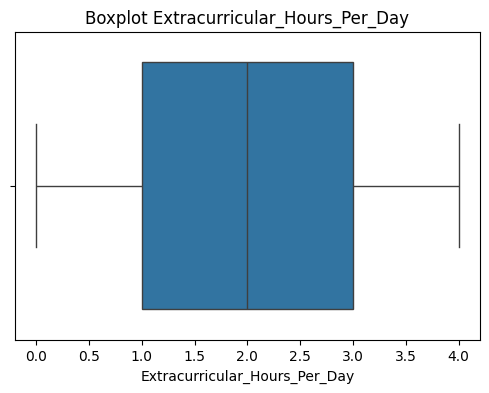

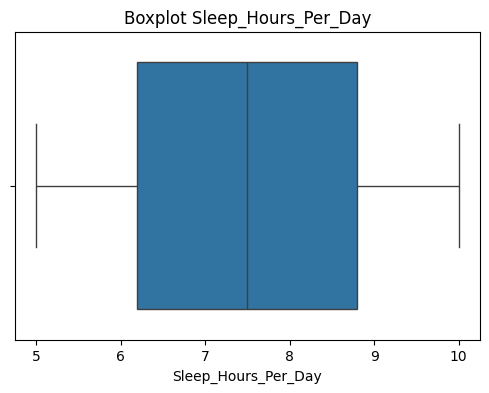

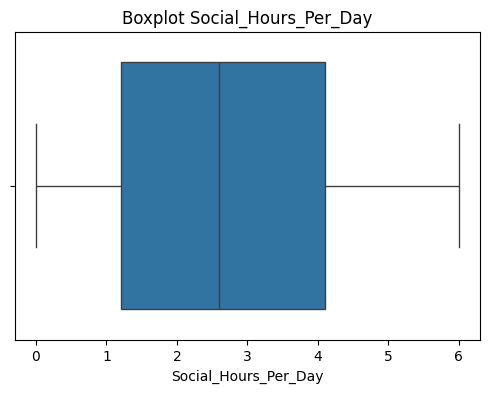

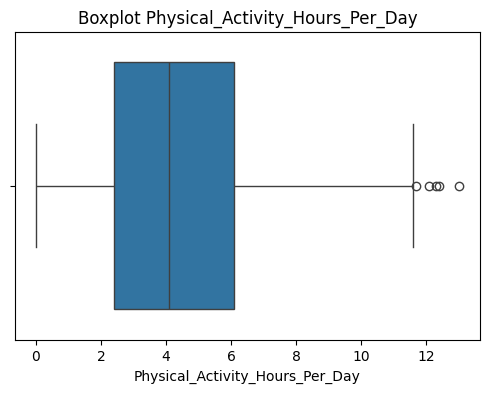

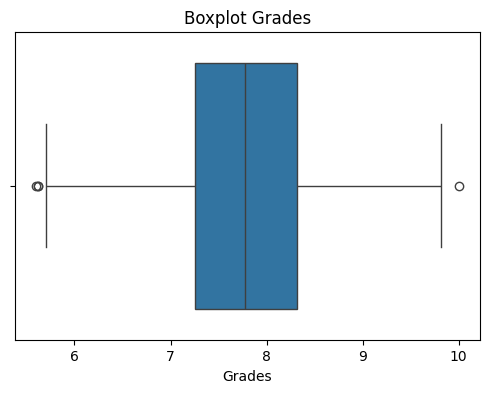

In [9]:
num_cols  = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

Dari hasil visualisasi terssebut menunjukkan terdapat outlier pada kolom **Physical_Activity_Hours_Per_Day** dan **Grades**
pada kolom **Grade** tidak terlalu berpengaruh dikarenakan masih bisa jika mahasiswa mendapakan grade under 5 atau 10
Penangan outlier hanya pada kolom **Physical_Activity_Hours_Per_Day** menggunakan metode IQR

In [10]:
# Hitung Q!, Q3 dan IQR hanya untuk kolom numerikal
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filters_outliers = ~((df[num_cols] < (Q1 - 1.0 * IQR)) |
                     (df[num_cols] > (Q3 + 1.0 * IQR))).any(axis=1)

# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
df = df[filters_outliers]

# Cek ukuran dataset setelah outliers dihapus
df.shape

(1918, 9)

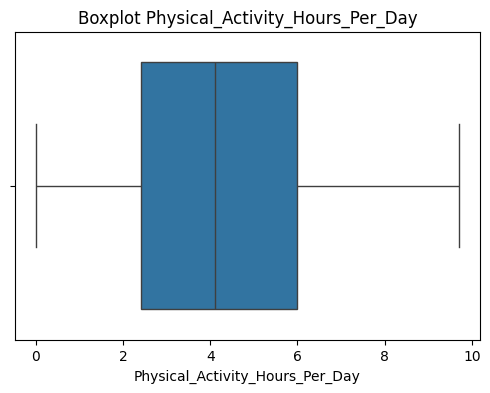

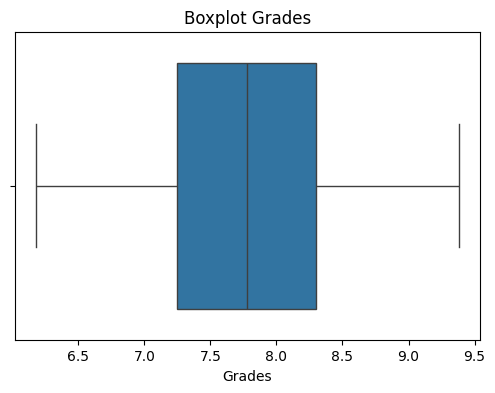

In [11]:
for col in ['Physical_Activity_Hours_Per_Day', 'Grades']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()

Setelah dilakukan penanganan menggunakan metode IQR data menjadi bersih dan aman untuk diproses, data berkurang menjadi 1964 hal tersebut tidak terlalu bermasalah dikarenakan data masih tergolong besar

### **Univariate Analysis**

In [12]:
# membagi fitur pada dataset menjadi dua bagian, numerical features dan categorical features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Fitur Numerik:")
print(num_cols)

print("\nFitur Categorical:")
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)

Fitur Numerik:
Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'Grades'],
      dtype='object')

Fitur Categorical:
Index(['Stress_Level', 'Gender'], dtype='object')


Membagi fitur pada dataset menjadi dua bagian, numerical features dan categorical features untuk memisahkan kedua fitur tersebut


#### **Categorical Features**


Distribusi Stress Level:
Stress_Level
Low         276
Moderate    667
High        975
Name: count, dtype: int64


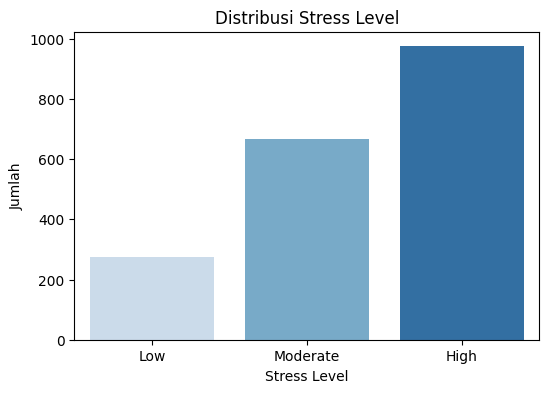

In [13]:
# Menghitung distribusi pada kolom kategorikal
stress_counts = df['Stress_Level'].value_counts().sort_values()
print("\nDistribusi Stress Level:")
print(stress_counts)

colors = sns.color_palette("Blues", len(stress_counts))
plot_data = pd.DataFrame({
    'Stress_Level': stress_counts.index,
    'Count': stress_counts.values
})

plt.figure(figsize=(6, 4))
sns.barplot(data=plot_data, x='Stress_Level', y='Count', hue='Stress_Level', palette=colors, dodge=False, legend=False)
plt.title('Distribusi Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Jumlah')
plt.show()


Menampilkan visualisasi distribusi pada stres level yang menunjukkan bahwa pada data ini terdapat banyak students yang mengalami level stres tinggi


Distribusi Gender:
Gender
Female    950
Male      968
Name: count, dtype: int64


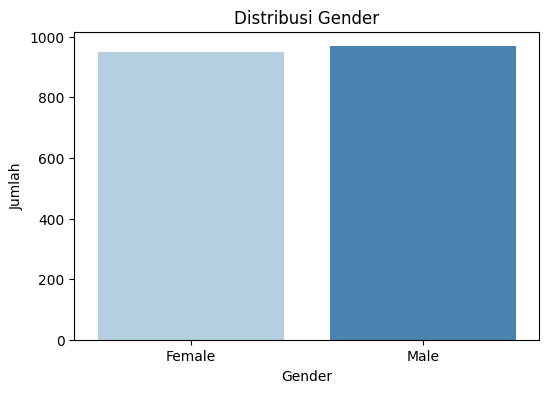

In [14]:
# Menghitung distribusi pada kolom kategorikal
gender_counts = df['Gender'].value_counts().sort_values()
print("\nDistribusi Gender:")
print(gender_counts)

colors = sns.color_palette("Blues", len(gender_counts))
plot_data = pd.DataFrame({
    'Gender': gender_counts.index,
    'Count': gender_counts.values
})

plt.figure(figsize=(6, 4))
sns.barplot(data=plot_data, x='Gender', y='Count', hue='Gender', palette=colors, dodge=False, legend=False)
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()


Distribusi pada kolom gender, menunjukkan perbandingan yang cukup seimbang

### **Numerical Features**

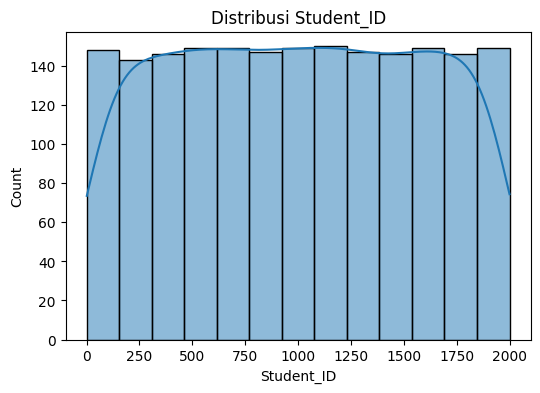

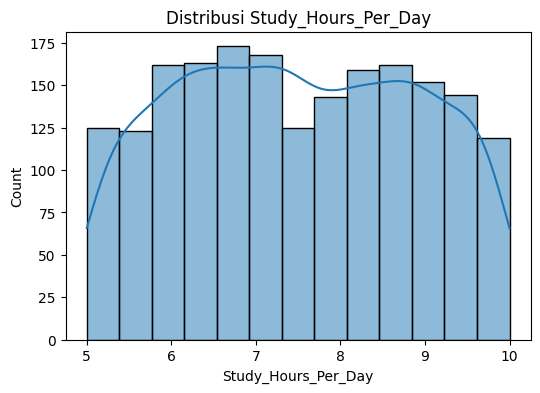

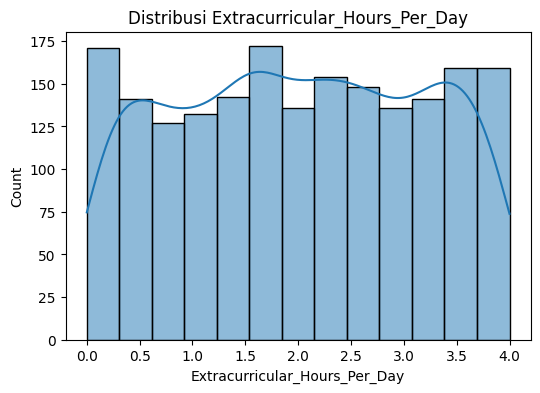

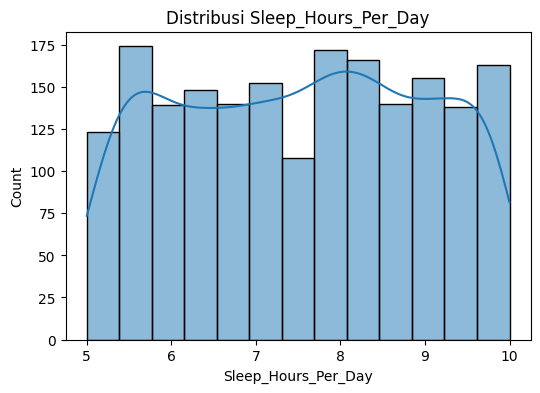

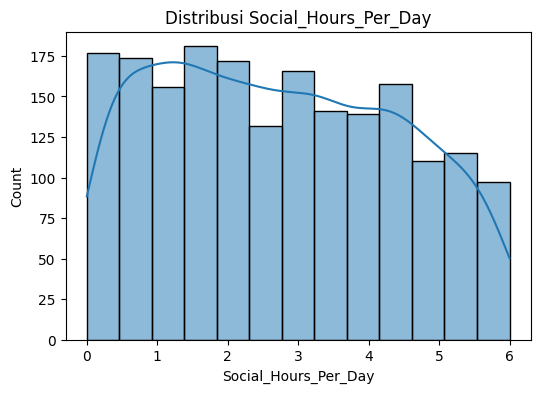

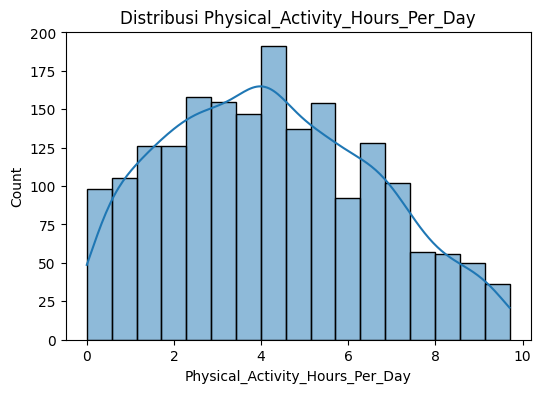

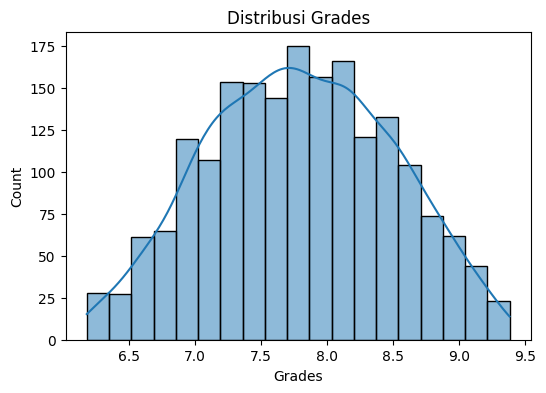

In [15]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
    plt.show()

Dari hasil visualisasi di atas kita dapat melihat distribusi pada masing-masing fitur numerik

### **Multivariate Analysis**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1918 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       1918 non-null   int64  
 1   Study_Hours_Per_Day              1918 non-null   float64
 2   Extracurricular_Hours_Per_Day    1918 non-null   float64
 3   Sleep_Hours_Per_Day              1918 non-null   float64
 4   Social_Hours_Per_Day             1918 non-null   float64
 5   Physical_Activity_Hours_Per_Day  1918 non-null   float64
 6   Stress_Level                     1918 non-null   object 
 7   Gender                           1918 non-null   object 
 8   Grades                           1918 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 149.8+ KB


#### **Categorical Features**

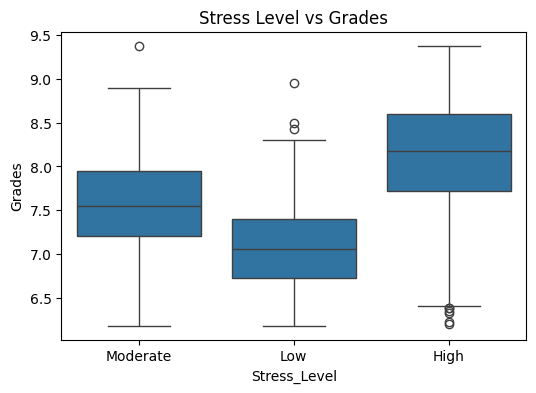

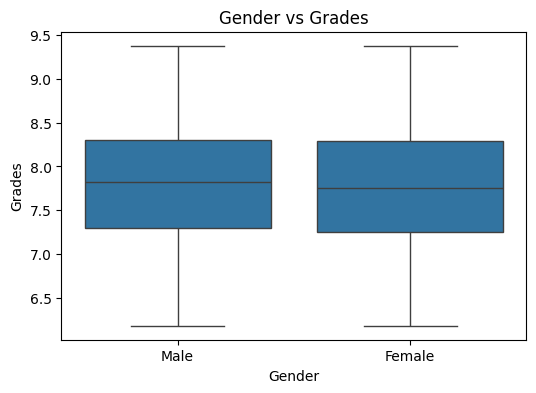

In [17]:
# visualisasi boxplot stres level dengan grades
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Stress_Level'], y=df['Grades'])
plt.title('Stress Level vs Grades')
plt.show()

# visualisasi boxplot gender dengan grades
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Gender'], y=df['Grades'])
plt.title('Gender vs Grades')
plt.show()

Pada hasil visualisasi pertama menunjukkan tingkat stres tertentu mungkin akan mendorong produktivitas.

Mahasiswa dengan stres sedang atau tinggi bisa jadi lebih termotivasi atau disiplin, dan menghasilkan performa lebih baik.

Namun stres tinggi tidak selalu positif, karena juga memunculkan outlier dengan nilai sangat rendah.

sedangankan pada visualisasi gender dengan grades menunjukkan distribusi yang seimbang

### **Numerical Features**

#### Visualisasi scatterplot

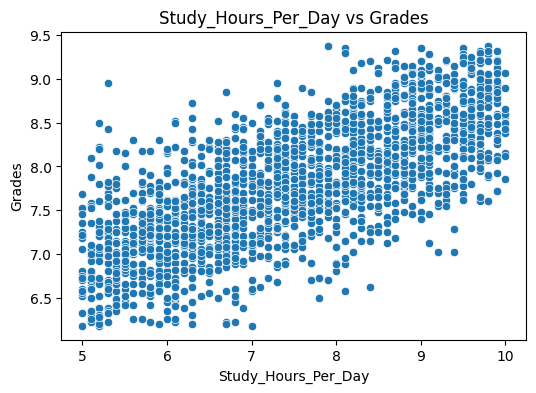

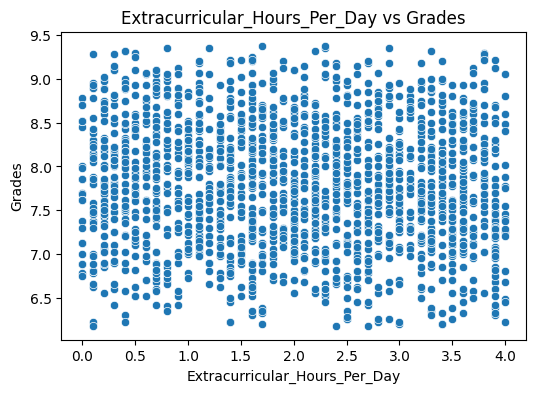

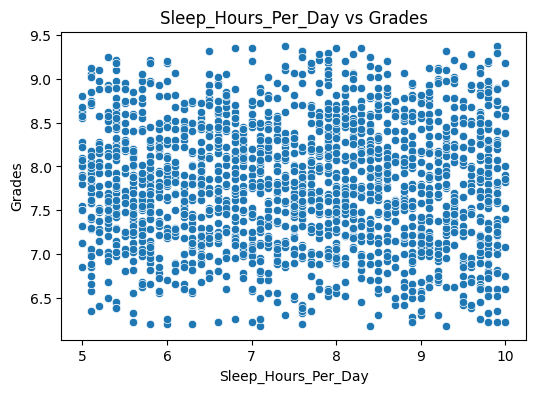

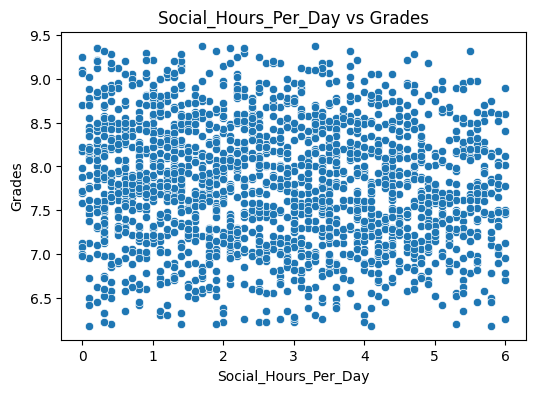

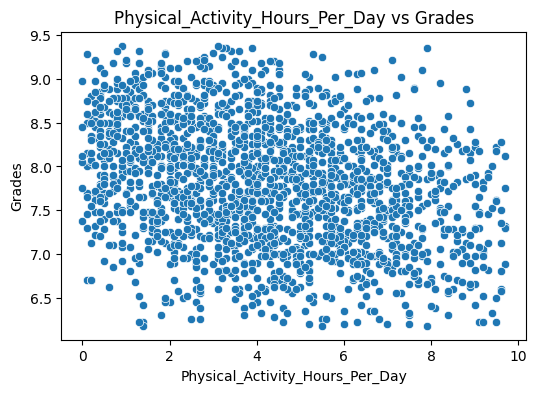

In [18]:
# Visualisasi scatterplot
predictor_cols = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
                  'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
                  'Physical_Activity_Hours_Per_Day']
for col in predictor_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df['Grades'])
    plt.title(f'{col} vs Grades')
    plt.show()

Dengan menggunakan scatter plot tersebut kita dapat melihat bahwa hubungan positif yang jelas hanya terdapat pada jumlah jam belajar, Semakin banyak mahasiswa belajar, semakin tinggi nilainya.

#### Visualisasi heatmap

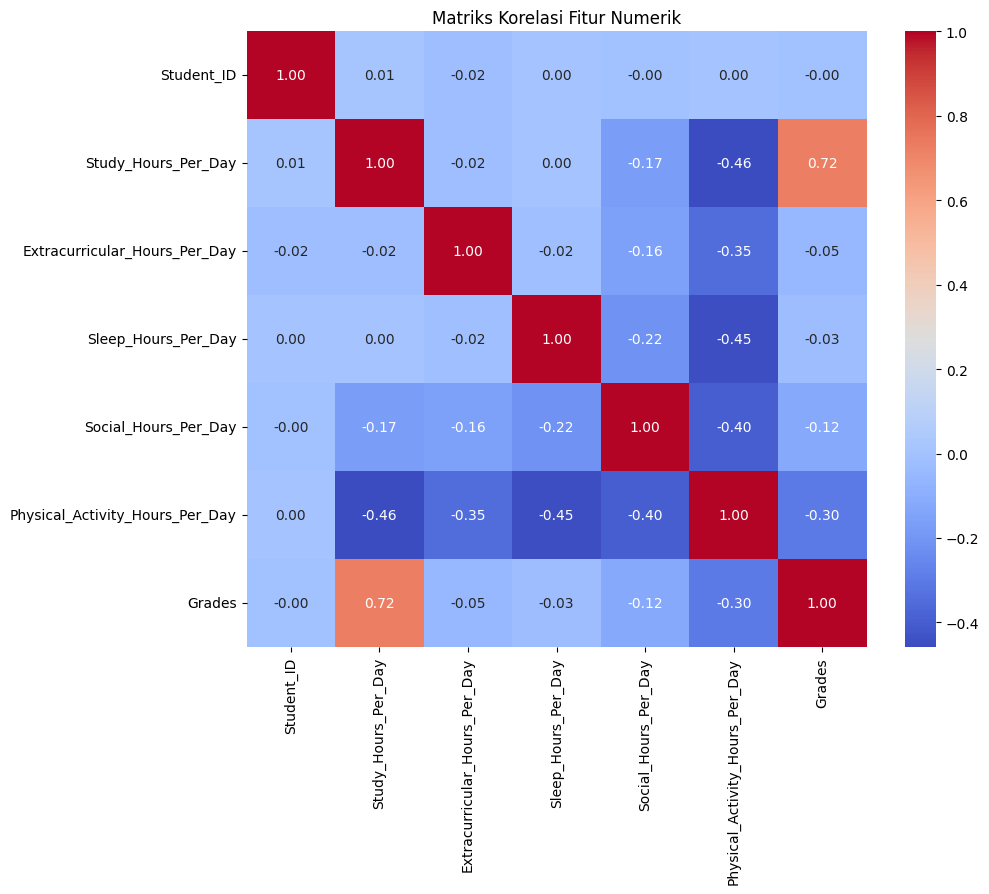

In [19]:
plt.figure(figsize=(10, 8))
# Hanya pilih kolom numerik untuk korelasi
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

Dari visualisasi diatas kita dapat melihat korelasi antar semua fitur numerik dalam dataset.

Dapat kita lihat bahwa faktor paling berpengaruh terhadap nilai (Grades) adalah Study_Hours_Per_Day,

Faktor lain seperti tidur, sosialisasi, ekstrakurikuler , aktivitas hanya memiliki pengaruh kecil atau tidak signifikan

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1918 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       1918 non-null   int64  
 1   Study_Hours_Per_Day              1918 non-null   float64
 2   Extracurricular_Hours_Per_Day    1918 non-null   float64
 3   Sleep_Hours_Per_Day              1918 non-null   float64
 4   Social_Hours_Per_Day             1918 non-null   float64
 5   Physical_Activity_Hours_Per_Day  1918 non-null   float64
 6   Stress_Level                     1918 non-null   object 
 7   Gender                           1918 non-null   object 
 8   Grades                           1918 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 149.8+ KB


Menghapus kolom Student_ID karena dirasa kurang berpengaruh terhadap Grades

In [21]:
df_processed = df.drop(['Student_ID'], axis=1)

In [22]:
# Mengecek apakah terdapat missing value setelah kolom tersebut dihapus
print("Jumlah nilai hilang per kolom setelah drop Student ID:")
print(df_processed.isnull().sum())

Jumlah nilai hilang per kolom setelah drop Student ID:
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
Stress_Level                       0
Gender                             0
Grades                             0
dtype: int64


## **Data Preparation**

### **Encoding pada Fitur Kategori**

In [23]:
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades
0,1,6.9,3.8,8.7,2.8,1.8,Moderate,Male,7.48
1,2,5.3,3.5,8.0,4.2,3.0,Low,Female,6.88
2,3,5.1,3.9,9.2,1.2,4.6,Low,Male,6.68
3,4,6.5,2.1,7.2,1.7,6.5,Moderate,Male,7.20
4,5,8.1,0.6,6.5,2.2,6.6,High,Male,8.78


Melakukan encoding pada fitur numerik untuk gender menggunakan label encoder karena hanya dua kategori saja male famale dan untuk level stres menggunakan Ordinal encoder karena data tersebut pada setiap kategori memiliki urutan, lalu menambahkan kolom baru hasil encode dan menghapus kolom lama

In [24]:
# Encoding pada fitur kategori gender dan level stres
le = LabelEncoder()
df_processed['Gender_Encoded'] = le.fit_transform(df_processed['Gender'])
df_processed.drop('Gender', axis=1, inplace=True)

# Tentukan urutan kategori yang benar
stress_categories = ['Low', 'Moderate', 'High']
ordinal_encoder_stress = OrdinalEncoder(categories=[stress_categories])

df_processed['Stress_Level_Encoded'] = ordinal_encoder_stress.fit_transform(df_processed[['Stress_Level']])
# Hapus kolom asli
df_processed.drop('Stress_Level', axis=1, inplace=True)

In [25]:
df_processed.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Grades,Gender_Encoded,Stress_Level_Encoded
0,6.9,3.8,8.7,2.8,1.8,7.48,1,1.0
1,5.3,3.5,8.0,4.2,3.0,6.88,0,0.0
2,5.1,3.9,9.2,1.2,4.6,6.68,1,0.0
3,6.5,2.1,7.2,1.7,6.5,7.20,1,1.0
4,8.1,0.6,6.5,2.2,6.6,8.78,1,2.0


Mengubah gender menjadi 0 dan 1
- 0 = Famale
- 1 = Male

Mengubah level stres menjadi 0 1 2
- 0 = Low
- 1 = Moderate
- 2 = High

### **Train-Test-Split Data**

In [26]:
# Split Data
X = df_processed.drop('Grades', axis=1) # Menghapus kolom target 'Grades' dari X
y = df_processed['Grades'] # Menyimpan kolom target 'Grades' sebagai y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Menampilkan hasil pembagian data
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape    : X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1534, 7), y_train=(1534,)
Test set shape    : X_test=(384, 7), y_test=(384,)


- Memisahkan data menjadi training set sebanyak 80% dan test set 20% yang berfungsi untuk melatih dan mengevaluasi model

### **Feature Scaling (Penskalaan Fitur)**

In [28]:
# Standarisasi menggunakan standardScaler
scaler = StandardScaler()

# Identifikasi kolom numerik yang perlu di-scale (setelah encoding)
numerical_features_to_scale = X_train.select_dtypes(include=np.number).columns

X_train_scaled = X_train.copy()
X_train_scaled[numerical_features_to_scale] = scaler.fit_transform(X_train[numerical_features_to_scale])

# Periksa hasil scaling
print("\nX_train_scaled (beberapa baris pertama):")
print(pd.DataFrame(X_train_scaled, columns=X_train.columns).head())


X_train_scaled (beberapa baris pertama):
      Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  Sleep_Hours_Per_Day  \
450              0.299528                      -1.576892            -1.327904   
147              1.091232                      -1.230151            -0.984858   
1852            -0.060337                      -0.016557            -0.984858   
960              0.227555                       1.197037             0.524542   
1870            -1.355853                       1.110352            -0.847640   

      Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  Gender_Encoded  \
450               0.416818                         1.103975       -1.029107   
147               0.954681                        -0.108294        0.971717   
1852             -0.658907                         1.103975       -1.029107   
960              -0.419857                        -0.735329        0.971717   
1870              1.193731                        -0.066491        0.971717 

- Menggunakan StandardScaler yang menghasilkan distirbusi dengan standar deviasi 1 dan mean sama dengan 0 dan berada pada rentang -1 dan 2
- Standarisasi hanya dilakukan pada data latiih terlebih dahulu untuk menghindari kebocoran informasi pada data uji

## **Model Development**

Model development menggunakan algoritma Ridge, Random Forest, dan Gradient Boosting

In [29]:
# Model yang akan digunakan:
models = {
    "KNN" : KNeighborsRegressor(n_neighbors=15),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

results = {}

# Training Model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

Penggunaan tiga algoritma bertujuan untuk membandingkan beberapa model untuk mencari mana yang terbaik, pada setiap algoritma tentunya memiliki perbedaan dalam menangani data regresi untuk prediksi nilai student

## **Evaluasi Model**

In [30]:
# Standarisasi fitur numerik pada data uji
X_test_scaled = X_test.copy()
X_test_scaled[numerical_features_to_scale] = scaler.transform(X_test[numerical_features_to_scale])

In [31]:
# Mengevaluasi performa model menggunakan matrik RMSE, R2, MAE
for name, model in models.items():
    y_pred_test = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)

    results[name] = {"RMSE": rmse, "R2": r2, "MAE": mae}
    print(f"--- {name} ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}\n")

results_df = pd.DataFrame(results).T.sort_values(by="R2", ascending=False)
print("\nPerbandingan Performa Model Awal (diurutkan berdasarkan R2):")
print(results_df)

--- KNN ---
RMSE: 0.5138
R2 Score: 0.4543
MAE: 0.4245

--- Random Forest ---
RMSE: 0.5106
R2 Score: 0.4611
MAE: 0.4117

--- Gradient Boosting ---
RMSE: 0.4926
R2 Score: 0.4984
MAE: 0.3942


Perbandingan Performa Model Awal (diurutkan berdasarkan R2):
                       RMSE        R2       MAE
Gradient Boosting  0.492585  0.498441  0.394165
Random Forest      0.510603  0.461078  0.411687
KNN                0.513809  0.454289  0.424458


- RMSE (Root Mean Squared Error): Seberapa besar rata-rata kesalahan prediksi.

- R² Score: Proporsi variansi yang dijelaskan oleh model.

- MAE (Mean Absolute Error): Rata-rata perbedaan absolut antara prediksi dan nilai asli.

- Dari hasil di atas dapat disimpulkan bahwa Gradient Boosting memiliki proporsi variansi paling tinggi yang mana semakin mendekati 1 maka akan semakin baik.

#### Visualisai

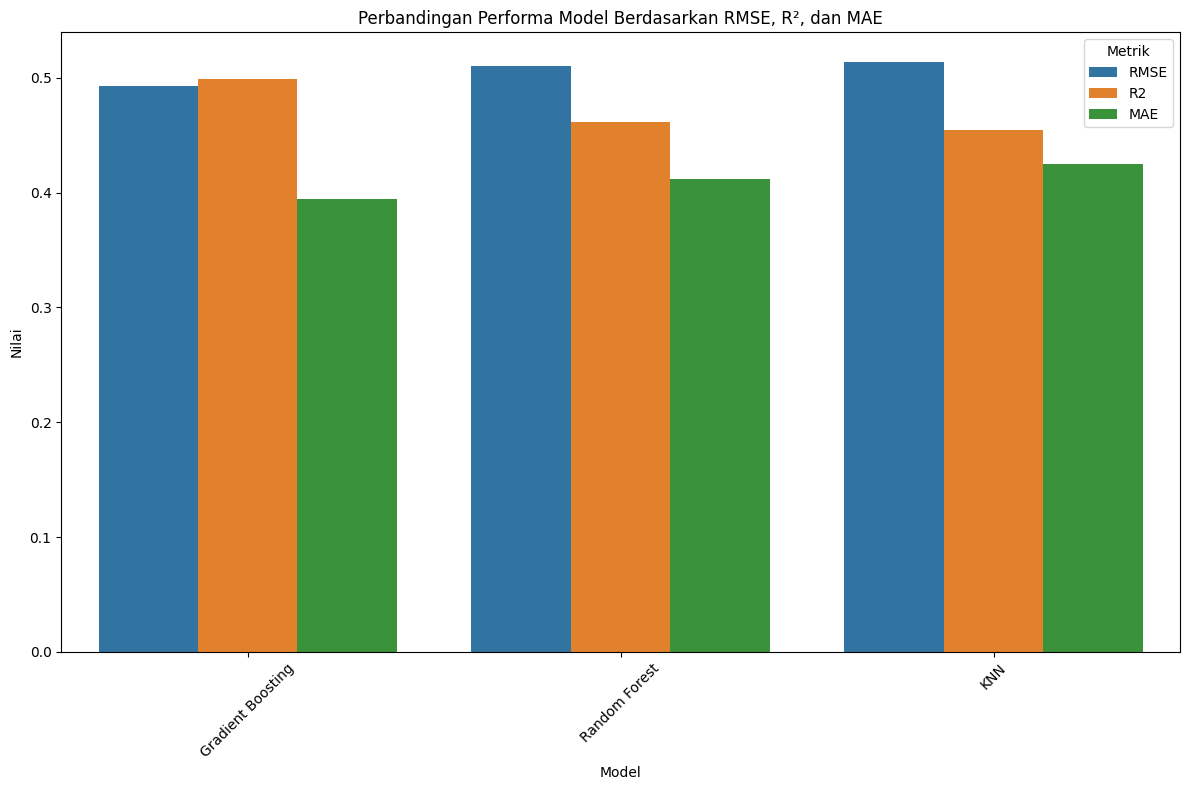

In [32]:
# Mengubah index menjadi kolom agar mudah untuk melt
results_df_reset = results_df.reset_index().rename(columns={"index": "Model"})
results_melted = results_df_reset.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Visualisasi BarPlot
plt.figure(figsize=(12, 8))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')
plt.title('Perbandingan Performa Model Berdasarkan RMSE, R², dan MAE')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.legend(title='Metrik')
plt.tight_layout()
plt.show()


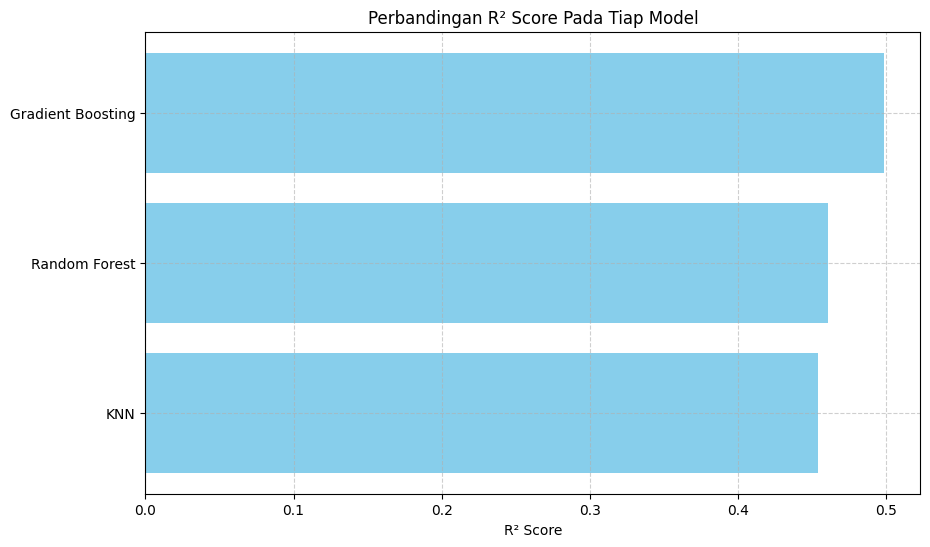

In [33]:
# Visualisasi perbandingan setiap model berdasarkan score R²
results_df["Model"] = results_df.index
plt.figure(figsize=(10, 6))
plt.barh(results_df["Model"], results_df["R2"], color='skyblue')
plt.xlabel("R² Score")
plt.title("Perbandingan R² Score Pada Tiap Model")
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


- Berdasarkan hasil evaluasi dan visualisasi tersebut maka best model adalah Gradient Boosting, dikarenakan  Gradient Boosting mendapatkan Score R2 tertinggi : 0.498441 dibandingkan dengan yang lainnya.

- Meskipun ketiga model (KNN, Random Forest, dan Gradient Boosting) memiliki kinerja yang cukup baik, Gradient Boosting secara konsisten menunjukkan metrik evaluasi yang lebih unggul (R² Score tertinggi, RMSE terendah, dan MAE terendah) dibandingkan dengan KNN dan Random Forest. Berdasarkan hal tersebut dapat diartikan bahwa Gradient Boosting adalah model yang paling akurat dalam memprediksi "Grades" pada data.

## **Hyperparameter Tuning**

Melakukan hyperparameter tuning pada model terbaik menggunakan gridsearch, dengan begitu diharapkan dapat meningkatkan kinerja model

In [34]:
# Hyperparameter Tuning
param_grid_gb = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4]
}

gb_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                              param_grid=param_grid_gb,
                              cv=5,
                              scoring='r2',
                              verbose=1,
                              n_jobs=-1)

gb_grid_search.fit(X_train_scaled, y_train)

print("Best Parameters for Gradient Boosting:", gb_grid_search.best_params_)
best_gb_model = gb_grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


Kode program diatas berfungsi untuk melakukan hyperparameter tuning menggunakan gridsearch kemudian mencari parameter terbaik untuk Gradient Bossting

In [35]:
# Evaluasi model after tuning
y_pred_final = best_gb_model.predict(X_test_scaled)

final_mae = mean_absolute_error(y_test, y_pred_final)
final_mse = mean_squared_error(y_test, y_pred_final)
final_rmse = np.sqrt(final_mse)
final_r2 = r2_score(y_test, y_pred_final)

print(f"\n--- Evaluasi Model Final ({best_gb_model.__class__.__name__}) ---")
print(f"MAE: {final_mae:.4f}")
print(f"RMSE: {final_rmse:.4f}")
print(f"R2 Score: {final_r2:.4f}")

# Tambahkan ke results
results["Gradient Boosting (Tuned)"] = {"RMSE": final_rmse, "R2": final_r2, "MAE": final_mae} # Updated key name for clarity
results_df = pd.DataFrame(results).T.sort_values(by="R2", ascending=False)
print("\nPerbandingan Performa Model Setelah Tuning (diurutkan berdasarkan R2):") # Updated print statement
print(results_df)


--- Evaluasi Model Final (GradientBoostingRegressor) ---
MAE: 0.3898
RMSE: 0.4848
R2 Score: 0.5142

Perbandingan Performa Model Setelah Tuning (diurutkan berdasarkan R2):
                               RMSE        R2       MAE
Gradient Boosting (Tuned)  0.484761  0.514249  0.389757
Gradient Boosting          0.492585  0.498441  0.394165
Random Forest              0.510603  0.461078  0.411687
KNN                        0.513809  0.454289  0.424458


Setelah dilakukan hyperparameter tuning model Gradient Boosting mengalami kenaikan hal tersebut menunjukkan bahwa hyperparameter tuning penting jika ingin meningkatkan kinerja model

## **Inference**

In [36]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1918 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study_Hours_Per_Day              1918 non-null   float64
 1   Extracurricular_Hours_Per_Day    1918 non-null   float64
 2   Sleep_Hours_Per_Day              1918 non-null   float64
 3   Social_Hours_Per_Day             1918 non-null   float64
 4   Physical_Activity_Hours_Per_Day  1918 non-null   float64
 5   Grades                           1918 non-null   float64
 6   Gender_Encoded                   1918 non-null   int64  
 7   Stress_Level_Encoded             1918 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 134.9 KB


In [38]:
# Inference menggunakan model terbaik
best_gb_model.fit(X_train_scaled, y_train)
expected_feature_order = X_train.columns.tolist()

# Fungsi input data mahasiswa
def get_user_input():
    print("\nMasukkan data mahasiswa:")
    while True:
        try:
            study_hours = float(input("  - Jam belajar per hari (misal 7.5): "))
            extracurricular_hours = float(input("  - Jam ekstrakurikuler per hari (misal 2): "))
            sleep_hours = float(input("  - Jam tidur per hari (misal 8): "))
            social_hours = float(input("  - Jam bersosialisasi per hari (misal 2): "))
            physical_activity = float(input("  - Jam aktivitas fisik per hari (misal 3): "))
            gender = input("  - Jenis kelamin (Male/Female): ").strip().title()
            stress = input("  - Tingkat stres (Low/Moderate/High): ").strip().title()

            if gender not in ['Male', 'Female'] or stress not in ['Low', 'Moderate', 'High']:
                raise ValueError("⚠️ Input kategori tidak valid.")

            # Encoding manual
            gender_encoded = {'Male': 0, 'Female': 1}[gender]
            stress_encoded = {'Low': 0, 'Moderate': 1, 'High': 2}[stress]

            # Create a dictionary with the input data
            input_data = {
                'Extracurricular_Hours_Per_Day': extracurricular_hours,
                'Sleep_Hours_Per_Day': sleep_hours,
                'Study_Hours_Per_Day': study_hours,
                'Social_Hours_Per_Day': social_hours,
                'Physical_Activity_Hours_Per_Day': physical_activity,
                'Gender_Encoded': gender_encoded,
                'Stress_Level_Encoded': stress_encoded
            }
            return pd.DataFrame([input_data], columns=expected_feature_order)

        except ValueError as e:
            print(f"❌ Kesalahan input: {e}. Silakan coba lagi.\n")

# Menyimpan hasil prediksi
all_predictions = []

# Loop interaktif
while True:
    new_student = get_user_input()
    # Pass the DataFrame with the correct column order to the scaler
    new_student_scaled = scaler.transform(new_student)

    predicted_grade = best_gb_model.predict(new_student_scaled)[0]
    all_predictions.append(predicted_grade)

    print(f"\n✅ Prediksi nilai mahasiswa: {predicted_grade:.2f}")

    lagi = input("\n Apakah ingin melakukan prediksi lagi? (y/n): ").strip().lower()
    if lagi != 'y':
        break

# Tampilkan semua hasil prediksi
print("\n Daftar semua prediksi yang telah dilakukan:")
for i, pred in enumerate(all_predictions, 1):
    print(f"  - Mahasiswa ke-{i}: Prediksi Nilai = {pred:.2f}")


Masukkan data mahasiswa:
  - Jam belajar per hari (misal 7.5): 9
  - Jam ekstrakurikuler per hari (misal 2): 1.5
  - Jam tidur per hari (misal 8): 5
  - Jam bersosialisasi per hari (misal 2): 2
  - Jam aktivitas fisik per hari (misal 3): 1
  - Jenis kelamin (Male/Female): male
  - Tingkat stres (Low/Moderate/High): High


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(



✅ Prediksi nilai mahasiswa: 8.39

 Apakah ingin melakukan prediksi lagi? (y/n): y

Masukkan data mahasiswa:
  - Jam belajar per hari (misal 7.5): 3
  - Jam ekstrakurikuler per hari (misal 2): 2.5
  - Jam tidur per hari (misal 8): 8
  - Jam bersosialisasi per hari (misal 2): 2.5
  - Jam aktivitas fisik per hari (misal 3): 3
  - Jenis kelamin (Male/Female): male
  - Tingkat stres (Low/Moderate/High): low


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(



✅ Prediksi nilai mahasiswa: 7.07

 Apakah ingin melakukan prediksi lagi? (y/n): n

 Daftar semua prediksi yang telah dilakukan:
  - Mahasiswa ke-1: Prediksi Nilai = 8.39
  - Mahasiswa ke-2: Prediksi Nilai = 7.07


Dari hasil Inference tersebut dapat disimpulkan bahwa ketika student belajar semakin lama maka akan meningkatkan nilai nya,
dan jika hanya belajar dengan waktu yang sebentar maka nilai akan menurun.

namun ketika belajar secara terus menurus juga tidak bagus, harus dibarengi dengan bersosialisai, aktivitas fisik (olahraga), dll. tentunya harus seimbangan antara beberapa hal tersebut